

# MiniProject: Data Analysis (TMDb_Movies Dataset)


## Introduction

 To complete Data Analysis Miniproject by using TMDb movies dataset. 

 This data set contains information about movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### Question that can analyised from this data set

1.Which movie had most profit during 2000-2005?

2.Which are the Movies with second highest and second lowest budgets?

3.Movies with most and least earned revenue.

4.What is the Average runtime of the movies in the Yer 2000?



### Variables
Single variable analysis(1d exploration): Popularity, revenue, runtime over the time 

Multiple variable analysis (2d exploration):Years of Release vs profitability, Revenue over time for the factors Popularity, Vote counts.

Any analysis conducted here is purely exploratory and any associations and inferences drawn are only tentative and are a basic 
step for conducting future analysis

In [ ]:
# import statements for all of the packages
#importing important files 

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


## Data Cleaning

>  In this section loading the data, check for cleanliness, and then trim and clean  dataset for analysis. 


### General Properties

In [ ]:
#loading the csv file and storing it in the variable "tmbd_data"

tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database

tmdb_data.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Obsevations from the data set

1.) Unit of currency is missing in the dataset.

2.)Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

3.)Some Columns have 0s in the rows for example budget etc.

4.)Some odd characters in columns like original_title, cast etc.

5.) vote_count is different for all movies. So direct avg_count cannot be done to conclude the popularity of the movie.

### Data Cleaning (Removing the unused information from the dataset )

#### Important observation regarding this process

Removing unused columns(id,imdb_id,vote_count,homepage,keywords)
 
Removing duplicates
 
Removing the entries or discarding the entries with budget or revenues with 0 values in them since they are not useful for analysis

Replacing zero with NANS 

Release date column into DateFormat

Formatting the budget and revenue columns with dollars 

#### 1. Removing unused columns 
 Columns that need to be deleted are id, imdb_id, vote_count, keywords, vote_average,populairty


In [ ]:
#creating a list of column to be deleted
del_col=[ 'id', 'imdb_id',  'homepage', 'keywords', 'overview']

#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(5)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. Removing duplicates

Finding out how many entries we have in the dataset

In [ ]:
rows, col = tmdb_data.shape
print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10865 total entries of movies and 16 no.of columns in it.


#### 3. Removing 0's from budget and the revenue columns 

In [ ]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)
rows, col = tmdb_data.shape

print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))


So after removing such entries, we now have only 3854 no.of movies.


#### 4. Replacing zero with NAN in runtime column.

In [ ]:
#replacing 0 with NaN of runtime column in the dataset
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)


#### 5.Changing the release date column into standard date format

In [ ]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

# printing the changed dataset
tmdb_data.head(2)


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


#### 6.. Changing format of budget and revenue column.

In [ ]:
#Checking the current format of columns in the dataset
tmdb_data.dtypes
change_type=['budget', 'revenue']

#changing data type
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)

#printing the changed information
tmdb_data.dtypes


popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis





#### Let us create a profit column for all the movies 

In [ ]:
# for creating a profit column we use insert function with column index position,name and value 
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])


In [ ]:
#checking if the column is created
tmdb_data.head(2)

,popularity,budget,profit_earned,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


### creating a common Function to be accessed for calculating min and max of any column and return concatenated

In [ ]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

### Research Question 1  (Which movie had most profit during 2000-2005? )

In [ ]:
sub1 = tmdb_data[(tmdb_data['release_year'] > 2000) & (tmdb_data['release_year'] < 2005) ]

In [ ]:
tmdb_data[tmdb_data['profit_earned'] == sub1['profit_earned'].max()]

,popularity,budget,profit_earned,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4949,7.122455,94000000,1024888979,1118888979,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,The eye of the enemy is moving.,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,2003-12-01,5636,7.9,2003,1.114231e+08,1.326278e+09


The most Profit movie during the period of 2000-2005 is "The Lord of the Rings: The Return of the King"

### Research Question 2  (Which are the Movies with second highest and second lowest budgets?) 

In [ ]:
# we will call the same function **calculate(column)** again for this analysis highest and lowest
calculate('budget')


,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
profit_earned,-413912431,99
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar


In [ ]:
tmdb_data['budget'] = tmdb_data['budget'].astype(int)
tmdb_data['budget'] = pd.to_numeric(tmdb_data['budget'])

Here its to find the second lowest and second highest budget

In [ ]:
tmdb_data['budget'].drop_duplicates().nsmallest(2).iloc[-1]

2

In [ ]:
tmdb_data[tmdb_data['budget'] == tmdb_data['budget'].drop_duplicates().nsmallest(2).iloc[-1]]

,popularity,budget,profit_earned,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8944,0.464188,2,14,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,First His Wife. Now His Daughter. It's Time To...,88,Action|Crime|Thriller,Cannon Films,1982-02-20,27,5.6,1982,4.519285,36.154278


In [ ]:
tmdb_data['budget'].nlargest(2).iloc[-1]

380000000

In [ ]:
tmdb_data[tmdb_data['budget'] == tmdb_data['budget'].nlargest(2).iloc[-1]]

,popularity,budget,profit_earned,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3375,4.95513,380000000,641683000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08


Whereas the column with id 8944 shows the second smallest budget i.e 2 dollar


Column with id 3375 shows the second largest budget i.e 380000000dollar.



### Research Question 3  (Movies with most and least earned revenue.) 

In [ ]:
calculate('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
profit_earned,2544505847,-5999998
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


Whereas the column with id 1386 shows the most earned revenue i.e 2781505847 dollar


Column with id 5067 shows the least earned revenue i.e 2 dollar.


### Research Question 4  (What is the Average runtime of the movies in the Yer 2000?) 

In [ ]:
tmdb_data['runtime'] = tmdb_data['runtime'].astype('float')

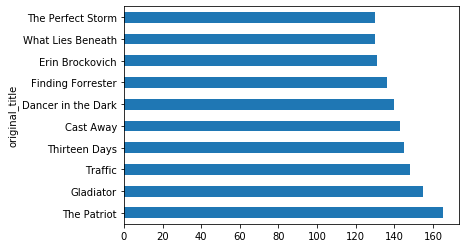

In [ ]:
df_t = tmdb_data[tmdb_data['release_year']==2000].groupby('original_title')['runtime'].mean().sort_values(ascending = False).head(10)

df_t.plot.barh()

In [ ]:
tmdb_data['runtime'].mean()

109.21582360570687

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form i.e. by graphical approach.

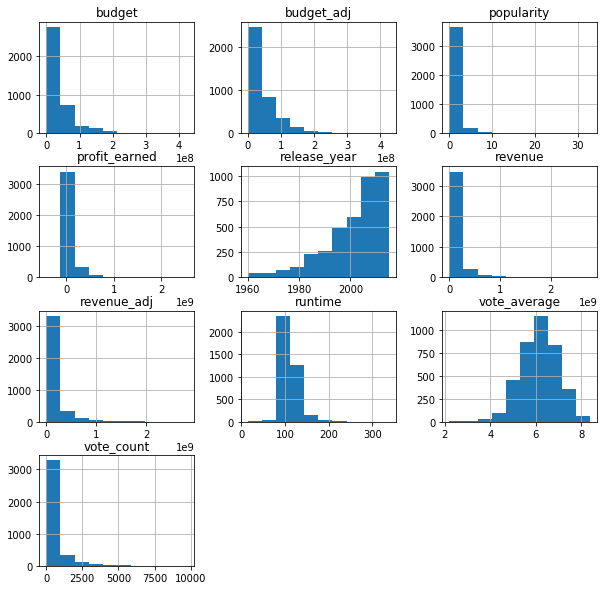

In [ ]:
tmdb_data.hist(figsize=(10,10));


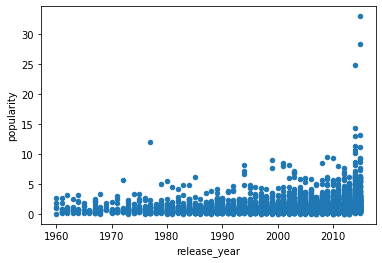

In [ ]:

# To plot relationship between release_year and popularity
tmdb_data.plot(x='release_year', y='popularity', kind='scatter');


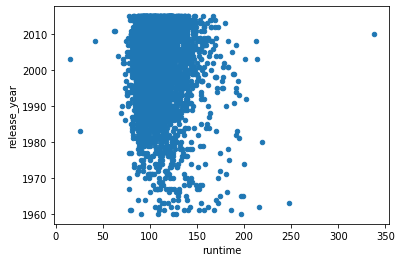

In [ ]:

#plot relationship between runtime and release_year
tmdb_data.plot(x='runtime', y='release_year', kind='scatter');


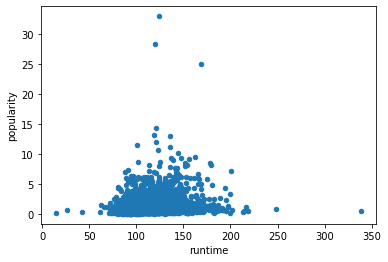

In [ ]:

#plot relationship between runtime and popularity
tmdb_data.plot(x='runtime', y='popularity', kind='scatter');